In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics

# Setup and Data Fetching 

In [73]:
df = pd.read_csv('HW2.csv')
df

C:\Users\me\AppData\Local\Temp\ipykernel_20812\1343038558.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('HW2.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


## Exploratory Data Analysis 

In [13]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [74]:
df = df.drop(['ID', 'Customer_ID', 'SSN', 'Name'], axis = 1) #dropped these columns as they seem unnecessary to machine learning
df

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,February,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,April,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,April,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,May,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,June,25,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,July,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [75]:
df = df.dropna()
df

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
6,July,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
8,January,28_,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,February,28,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good
10,March,28,Teacher,34847.84_,3037.986667,2,1385,6,1,Credit-Builder Loan,...,_,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.51597569589465,High_spent_Large_value_payments,466.46647639764313,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,March,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,_,502.38,39.323569,31 Years and 5 Months,No,35.104023,140.58140274528395,High_spent_Medium_value_payments,410.256158,Poor
99995,April,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,May,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,June,25,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor


In [18]:
df['Occupation'].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Mechanic', 'Writer', 'Accountant', 'Architect', 'Musician',
       'Developer'], dtype=object)

In [76]:
df = df[df.Occupation != '_______']

In [23]:
df['Credit_Mix'].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [77]:
df = df[df.Credit_Mix != '_']

In [78]:
df['Age'] = df['Age'].str.extract('(\d+)', expand=False)
df = df.astype({'Age':'int'})


In [41]:
df[df['Age'] > 100]

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
122,March,181,Scientist,31993.78,2942.148333,6,6,7,2,"Payday Loan, and Home Equity Loan",...,Standard,818.22,27.380109,17 Years and 0 Months,Yes,45.141298,264.25708850339777,Low_spent_Small_value_payments,274.8164466052998,Standard
219,April,995,Accountant,43070.24,3622.186667,3,3,18,1,Debt Consolidation Loan,...,Standard,1233.1,24.331772,19 Years and 5 Months,Yes,30.576085,74.92037487328841,High_spent_Medium_value_payments,506.7222069702167,Standard
243,April,5079,Scientist,20186.02,1684.168333,1,5,1,2,"Auto Loan, and Home Equity Loan",...,Good,413.32,22.743582,18 Years and 6 Months,No,29.534584,104.72383354456407,High_spent_Small_value_payments,294.1584160682732,Good
301,June,7080,Engineer,72559.36,6284.613333,4,5,17,-100,"Home Equity Loan, Mortgage Loan, Credit-Builde...",...,Standard,1173.7,38.080380,28 Years and 4 Months,No,215.839171,172.9621775288686,High_spent_Medium_value_payments,489.6599851654931,Standard
340,May,500,Architect,20574.47,1740.539167,6,1327,14,4,"Credit-Builder Loan, Personal Loan, Credit-Bui...",...,Standard,749.95,29.036164,11 Years and 3 Months,Yes,49.348666,139.97856227172545,Low_spent_Large_value_payments,254.72668807344257,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99738,March,8315,Scientist,18940.82,1281.401667,9,5,33,6_,"Debt Consolidation Loan, Payday Loan, Not Spec...",...,Bad,1327.42,31.911788,15 Years and 6 Months,Yes,87.857445,59.24765736762741,High_spent_Small_value_payments,241.035064,Poor
99762,March,500,Accountant,17818.6,1659.883333,4,6,14,1,Not Specified,...,Standard,301.52,26.398987,18 Years and 5 Months,NM,11.581102,34.98032691383901,High_spent_Medium_value_payments,369.426905,Standard
99776,January,8425,Writer,18512.97,1494.747500,7,5,18,3,"Student Loan, Student Loan, and Mortgage Loan",...,Standard,1366.56,29.253092,10 Years and 11 Months,Yes,24.621173,63.28265063631176,High_spent_Medium_value_payments,311.570927,Standard
99913,February,2263,Media_Manager,20059.98,1523.665000,8,5,12,4,"Home Equity Loan, Payday Loan, Not Specified, ...",...,Good,909.01,25.982154,16 Years and 4 Months,No,45.076827,74.71358019803843,High_spent_Small_value_payments,292.576093,Poor


In [79]:
 df = df[df.Age <= 100] #getting rid of wrong age records.
df

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
6,July,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
9,February,28,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good
12,May,28,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,...,Good,605.03,34.977895,26 Years and 11 Months,No,18.816215,130.11542024292334,Low_spent_Small_value_payments,444.8670318506144,Good
13,June,28,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,...,Good,605.03,33.381010,27 Years and 0 Months,No,18.816215,43.477190144355745,High_spent_Large_value_payments,481.505261949182,Good
15,August,28,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,...,Good,605.03,32.933856,27 Years and 2 Months,No,18.816215,218.90434353388733,Low_spent_Small_value_payments,356.07810855965045,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99985,February,28,Architect,20002.88,1929.906667,10,8,29,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",...,Bad,3571.7_,39.772607,5 Years and 9 Months,Yes,12112.000000,148.2752327451465,Low_spent_Small_value_payments,273.750662,Poor
99986,March,28,Architect,20002.88,1929.906667,10,8,29,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",...,Bad,3571.7,24.713861,5 Years and 10 Months,Yes,60.964772,76.28279349064607,Low_spent_Small_value_payments,345.743101,Poor
99991,August,29,Architect,20002.88,1929.906667,10,8,29,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",...,Bad,3571.7,37.140784,6 Years and 3 Months,Yes,60.964772,34.66290609052614,High_spent_Large_value_payments,337.362988,Standard
99997,June,25,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor


In [80]:
df['Annual_Income'] = df['Annual_Income'].str.extract('(\d+)', expand=False)
df = df.astype({'Annual_Income':'float'})

In [81]:
df = df[df.Annual_Income <= 200000] #took out extreme outliers that would skew data
df

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
6,July,23,Scientist,19114.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
9,February,28,Teacher,34847.0,3037.986667,2,4,6,1,Credit-Builder Loan,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good
12,May,28,Teacher,34847.0,3037.986667,2,4,6,1,Credit-Builder Loan,...,Good,605.03,34.977895,26 Years and 11 Months,No,18.816215,130.11542024292334,Low_spent_Small_value_payments,444.8670318506144,Good
13,June,28,Teacher,34847.0,3037.986667,2,4,6,1,Credit-Builder Loan,...,Good,605.03,33.381010,27 Years and 0 Months,No,18.816215,43.477190144355745,High_spent_Large_value_payments,481.505261949182,Good
15,August,28,Teacher,34847.0,3037.986667,2,4,6,1,Credit-Builder Loan,...,Good,605.03,32.933856,27 Years and 2 Months,No,18.816215,218.90434353388733,Low_spent_Small_value_payments,356.07810855965045,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99985,February,28,Architect,20002.0,1929.906667,10,8,29,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",...,Bad,3571.7_,39.772607,5 Years and 9 Months,Yes,12112.000000,148.2752327451465,Low_spent_Small_value_payments,273.750662,Poor
99986,March,28,Architect,20002.0,1929.906667,10,8,29,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",...,Bad,3571.7,24.713861,5 Years and 10 Months,Yes,60.964772,76.28279349064607,Low_spent_Small_value_payments,345.743101,Poor
99991,August,29,Architect,20002.0,1929.906667,10,8,29,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",...,Bad,3571.7,37.140784,6 Years and 3 Months,Yes,60.964772,34.66290609052614,High_spent_Large_value_payments,337.362988,Standard
99997,June,25,Mechanic,39628.0,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor


In [84]:
df = df[df.Num_Bank_Accounts > 0] #get rid of nonsense number of bank accounts
df = df[df.Num_Bank_Accounts < 11]

In [88]:
df = df[df.Num_Credit_Card < 11]
df['Num_Credit_Card'].describe()

count    38993.000000
mean         5.706024
std          2.073678
min          0.000000
25%          4.000000
50%          6.000000
75%          7.000000
max         10.000000
Name: Num_Credit_Card, dtype: float64

In [90]:
df = df[df.Interest_Rate < 40]
df['Interest_Rate'].describe()

count    38156.000000
mean        15.551604
std          8.842543
min          1.000000
25%          8.000000
50%         15.000000
75%         21.000000
max         34.000000
Name: Interest_Rate, dtype: float64

In [92]:
df['Num_of_Loan'] = df['Num_of_Loan'].str.extract('(\d+)', expand=False)
df = df.astype({'Num_of_Loan':'int'})
df['Num_of_Loan'].describe()

count    38156.000000
mean        11.328887
std         62.411846
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max       1480.000000
Name: Num_of_Loan, dtype: float64

In [93]:
df = df[df.Num_of_Loan < 15]
df['Num_of_Loan'].describe()

count    36490.000000
mean         4.032639
std          2.231621
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max          9.000000
Name: Num_of_Loan, dtype: float64

In [108]:
df.Delay_from_due_date = df.Delay_from_due_date.astype(int)
df['Delay_from_due_date'] = df['Delay_from_due_date'].apply(int) #converted to integer for performance reasons


int64


count    36490.000000
mean        22.535297
std         15.244660
min         -5.000000
25%         11.000000
50%         19.000000
75%         29.000000
max         67.000000
Name: Delay_from_due_date, dtype: float64

In [111]:
df['Num_of_Delayed_Payment']= df['Num_of_Delayed_Payment'].str.extract('(\d+)', expand=False)
df = df.astype({'Num_of_Delayed_Payment':'int'})

In [116]:
df = df[df.Num_of_Delayed_Payment < 50]
df.Num_of_Delayed_Payment.describe()

count    36207.000000
mean        14.018588
std          6.101293
min          0.000000
25%         10.000000
50%         15.000000
75%         19.000000
max         28.000000
Name: Num_of_Delayed_Payment, dtype: float64

In [119]:
df['Changed_Credit_Limit']= df['Changed_Credit_Limit'].str.extract('(\d+)', expand=False)
df = df.astype({'Changed_Credit_Limit':'float'})

In [124]:
df = df[df.Num_Credit_Inquiries < 15]
df.Num_Credit_Inquiries.describe()

count    34921.000000
mean         6.054151
std          3.705846
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max         14.000000
Name: Num_Credit_Inquiries, dtype: float64

In [127]:
df.Credit_Mix.unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [130]:
df['Outstanding_Debt']= df['Outstanding_Debt'].str.extract('(\d+)', expand=False)
df = df.astype({'Outstanding_Debt':'float'})
df.Outstanding_Debt.describe()

count    34921.000000
mean      1516.216832
std       1192.091066
min          0.000000
25%        606.000000
50%       1253.000000
75%       2156.000000
max       4998.000000
Name: Outstanding_Debt, dtype: float64

In [131]:
df.Credit_Utilization_Ratio.describe()

count    34921.000000
mean        32.201121
std          5.057045
min         20.881250
25%         28.052595
50%         32.194192
75%         36.408991
max         49.564519
Name: Credit_Utilization_Ratio, dtype: float64

In [133]:
df.Credit_History_Age.unique()

array(['22 Years and 7 Months', '26 Years and 8 Months',
       '26 Years and 11 Months', '27 Years and 0 Months',
       '27 Years and 2 Months', '17 Years and 10 Months',
       '18 Years and 3 Months', '18 Years and 4 Months',
       '17 Years and 3 Months', '17 Years and 4 Months',
       '17 Years and 5 Months', '17 Years and 6 Months',
       '17 Years and 7 Months', '21 Years and 5 Months',
       '21 Years and 8 Months', '21 Years and 11 Months',
       '26 Years and 6 Months', '26 Years and 7 Months',
       '19 Years and 2 Months', '19 Years and 3 Months',
       '19 Years and 5 Months', '19 Years and 6 Months',
       '19 Years and 7 Months', '19 Years and 8 Months',
       '25 Years and 5 Months', '25 Years and 7 Months',
       '25 Years and 9 Months', '25 Years and 10 Months',
       '26 Years and 10 Months', '27 Years and 1 Months',
       '27 Years and 4 Months', '27 Years and 5 Months',
       '9 Years and 0 Months', '9 Years and 2 Months',
       '9 Years and 3 Months

In [145]:
df.Payment_of_Min_Amount.unique()
df = df[df.Payment_of_Min_Amount != 'NM']
df.Payment_of_Min_Amount.describe()

count     23668
unique        2
top         Yes
freq      15323
Name: Payment_of_Min_Amount, dtype: object

In [146]:
df = df[df.Total_EMI_per_month< 200]
df.Total_EMI_per_month.describe()

count    23668.000000
mean        74.608342
std         49.580385
min          4.462837
25%         35.232215
50%         61.756904
75%        105.413036
max        199.904691
Name: Total_EMI_per_month, dtype: float64

In [140]:

df['Amount_invested_monthly']= df['Amount_invested_monthly'].str.extract('(\d+)', expand=False)
df = df.astype({'Amount_invested_monthly':'int'})
df.Amount_invested_monthly.describe()

count    28109.000000
mean       590.158988
std       2018.751427
min          0.000000
25%         64.000000
50%        115.000000
75%        214.000000
max      10000.000000
Name: Amount_invested_monthly, dtype: float64

In [142]:
df = df[df.Amount_invested_monthly < 3000]
df.Amount_invested_monthly.describe()

count    26879.000000
mean       159.558726
std        156.208023
min          0.000000
25%         63.000000
50%        110.000000
75%        195.000000
max       1607.000000
Name: Amount_invested_monthly, dtype: float64

In [147]:
df.Payment_Behaviour.unique()

array(['Low_spent_Small_value_payments',
       'High_spent_Large_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Small_value_payments'], dtype=object)

In [148]:
df = df[df.Payment_Behaviour != '!@9#%8']

In [151]:
df['Monthly_Balance']= df['Monthly_Balance'].str.extract('(\d+)', expand=False)
df = df.astype({'Monthly_Balance':'float'})
df.Monthly_Balance.describe()

count    2.159600e+04
mean     4.630487e+22
std      3.928553e+24
min      0.000000e+00
25%      2.640000e+02
50%      3.170000e+02
75%      4.200000e+02
max      3.333333e+26
Name: Monthly_Balance, dtype: float64

In [156]:
df = df[df.Monthly_Balance < 2000]

In [155]:
df.Credit_Score.unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

## Plotting

Text(0.5, 0, 'Annual Income')

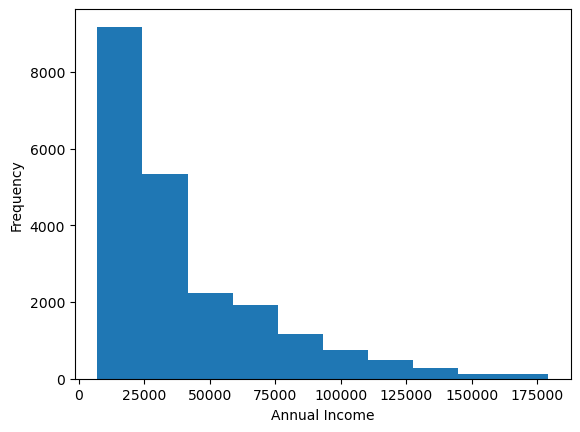

In [158]:
df.Annual_Income.plot.hist().set_xlabel("Annual Income")

Much of the data comprises of below 100k in annual income

Text(0.5, 0, 'Days away from payment')

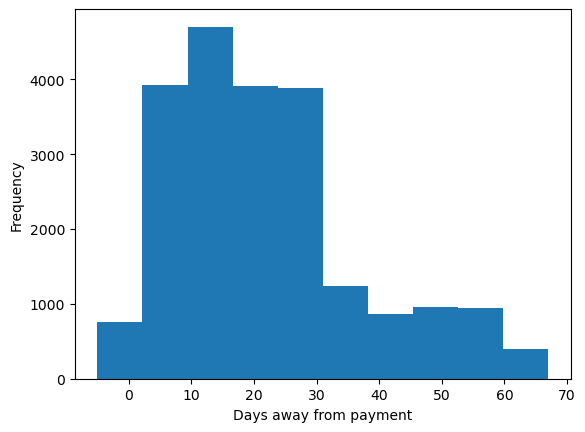

In [159]:
df['Delay_from_due_date'].plot.hist().set_xlabel("Days away from payment")

Much of the data comprises of of people who are very close to their due date

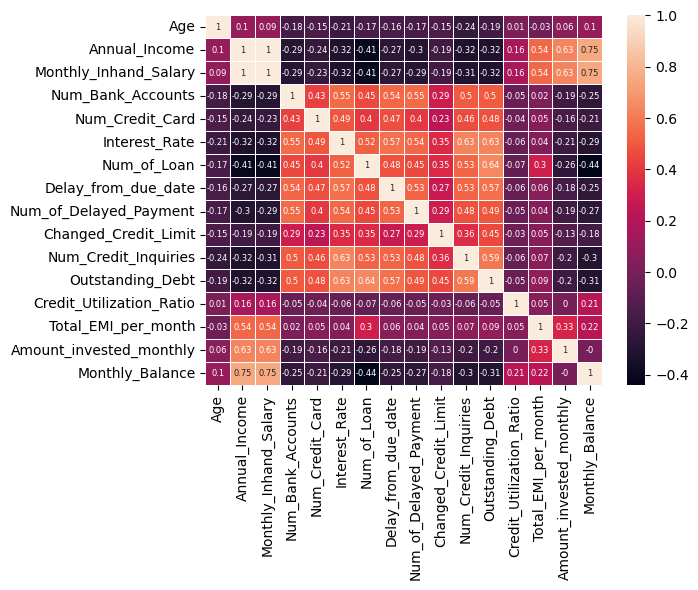

In [163]:
corr = df.corr().round(2)
sns.heatmap(corr, linewidths = .4, annot =True, annot_kws ={"fontsize" : 6})
plt.show()

Annual income is 1:1 correlated with monthly inhand salary 

## Encoding

In [205]:
df.dtypes

Month                                                   int64
Age                                                     int32
Annual_Income                                         float64
Num_Bank_Accounts                                       int64
Num_Credit_Card                                         int64
Interest_Rate                                           int64
Num_of_Loan                                             int32
Type_of_Loan                                           object
Delay_from_due_date                                     int64
Num_of_Delayed_Payment                                  int32
Changed_Credit_Limit                                  float64
Num_Credit_Inquiries                                  float64
Credit_Mix                                              int64
Outstanding_Debt                                      float64
Credit_Utilization_Ratio                              float64
Credit_History_Age                                    float64
Payment_

In [169]:
df['Month'] = pd.to_datetime(df.Month, format='%B').dt.month #changed months to numbers

In [174]:
df.Payment_of_Min_Amount.replace(('Yes', 'No'), (1, 0), inplace=True)#changed payment min to 0, 1

In [177]:
df['Credit_Mix'].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [178]:
credit_mix_mapping = {'Good': 1, 'Standard': 2, 'Bad': 3} #numerical encoding for credit mix, reasoning: ordinal


df['Credit_Mix'] = df['Credit_Mix'].map(credit_mix_mapping)

In [181]:
df['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [182]:
credit_score_mapping = {'Good': 1, 'Standard': 2, 'Poor': 3} #numerical encoding for credit score, reasoning: ordinal


df['Credit_Score'] = df['Credit_Score'].map(credit_mix_mapping)

In [187]:
df = pd.get_dummies(data=df, columns=['Occupation', 'Payment_Behaviour'])

In [190]:
df = df.drop(['Monthly_Inhand_Salary'], axis = 1) #dropping due to 1:1 correlation, avoiding multicolinearity issue

In [194]:
df['Credit_History_Age']

6         22 Years and 7 Months
9         26 Years and 8 Months
12       26 Years and 11 Months
13        27 Years and 0 Months
15        27 Years and 2 Months
                  ...          
98248     16 Years and 5 Months
98255     17 Years and 0 Months
98277    28 Years and 10 Months
98280     5 Years and 11 Months
98285      6 Years and 4 Months
Name: Credit_History_Age, Length: 21593, dtype: object

In [203]:
import re
def split_and_retrieve_date(x):#retrieve the first and second number from credit history and make float, ie 22 year 7 months --> 22.7
    y = re.findall(r'\d+', x)
    return float(y[0] + "." + y[1])

df["Credit_History_Age"] = df["Credit_History_Age"].apply(split_and_retrieve_date) #convert credit history to floats

In [204]:
df["Credit_History_Age"].describe()

count    21593.000000
mean        17.833772
std          8.241737
min          0.100000
25%         11.300000
50%         17.600000
75%         24.300000
max         33.800000
Name: Credit_History_Age, dtype: float64

In [220]:
results = set()
df['Type_of_Loan'].str.lower().str.split(',').apply(results.update)
print(results)

{' home equity loan', 'not specified', ' and credit-builder loan', 'student loan', 'home equity loan', 'mortgage loan', ' not specified', ' personal loan', ' payday loan', ' and payday loan', ' credit-builder loan', ' debt consolidation loan', ' student loan', ' auto loan', 'credit-builder loan', ' and student loan', ' and mortgage loan', ' and personal loan', ' and debt consolidation loan', 'payday loan', ' and home equity loan', 'auto loan', 'personal loan', ' and not specified', ' and auto loan', 'debt consolidation loan', ' mortgage loan'}


In [248]:
types_of_loans = ['home equity', 'not specified', 'credit-builder', 'student', 'mortgage', 'auto', 'debt consolidation', 'personal', 'payday']
#df['Type_of_Loan'].str.lower().str.contains('credit-builder loan').astype(int)
for x in types_of_loans:
    y = x + " loan"
    y = y.replace(" ", "_")
    df[y] = df['Type_of_Loan'].str.lower().str.contains(x).astype(int)


In [249]:
df.dtypes

Month                                                   int64
Age                                                     int32
Annual_Income                                         float64
Num_Bank_Accounts                                       int64
Num_Credit_Card                                         int64
Interest_Rate                                           int64
Num_of_Loan                                             int32
Type_of_Loan                                           object
Delay_from_due_date                                     int64
Num_of_Delayed_Payment                                  int32
Changed_Credit_Limit                                  float64
Num_Credit_Inquiries                                  float64
Credit_Mix                                              int64
Outstanding_Debt                                      float64
Credit_Utilization_Ratio                              float64
Credit_History_Age                                    float64
Payment_

In [250]:
df = df.drop(['Type_of_Loan'], axis = 1) #dropping now that we hot encoded